# Regret Evaluation

<i>Created by Kristian G</i>


Preliminaries

In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode
from ggplot import *
import json
from frame_experiment_table import FrameExperimentTable
%pylab inline
# %load_ext rmagic
%load_ext rpy2.ipython
%reload_ext rpy2.ipython
import pylab
from __future__ import division

import seaborn as sns
sns.set_style("whitegrid", {'font.family': [u'serif']})
sns.set(style="ticks", font='serif')
sns.set_context("poster", font_scale=1.5)



Populating the interactive namespace from numpy and matplotlib
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


`%matplotlib` prevents importing * from pylab and numpy


In [14]:
%%R
rm(list=ls())

##Load dataset

In [15]:
picture_foler = "/Users/kristian/Dropbox/exp_frame_effects/Images/"
gg = FrameExperimentTable('logs/data_scenario_changed')
# gg.add_records('logs/data_incremental_file','new')
# gg.add_records_csv('logs/data_scramble_filled_csv.csv')
# gg.add_records('logs/data_scenario_changed','new')
gg.filter_noise()
gg.code_for_stat_ana()
gg.code_survey_numeric()

print ''

(55, 40)
classify_field - Fields Excluded
(6,)
(55, 42)
New Usability Columns
(55, 44)
set([1, 2])
multi
set([1, 3])
multi
set([1])
e-mail
set([1, 2])
multi
set([1])
e-mail
set([3])
self-depositing
set([1, 3])
multi
set([2])
self-depositing
set([1, 2])
multi
set([3])
self-depositing
set([1])
e-mail
set([1, 2])
multi
set([2])
self-depositing
set([1])
e-mail
set([1, 2, 3])
multi
set([1])
e-mail
set([2])
self-depositing
set([2])
self-depositing
set([1, 3])
multi
set([1])
e-mail
set([4])
Never
set([1, 3])
multi
set([2])
self-depositing
set([4])
Never
set([2])
self-depositing
set([1, 3])
multi
set([2])
self-depositing
set([1, 3])
multi
set([2])
self-depositing
set([])

set([2])
self-depositing
set([2])
self-depositing
set([1])
e-mail
set([2, 3])
self-depositing
set([2])
self-depositing
set([])

set([4])
Never
set([])

set([3, 4])
Never
set([])

set([1, 2])
multi
set([1, 2])
multi
set([4])
Never
set([])

set([1, 2, 3])
multi
set([2])
self-depositing
set([2])
self-depositing
set([3])
self-dep

## Metric

Instead of using 3 outputs as the questionary has we use a single output. since for all the measurements (ease, support, time) higher is better we use a measure of centrality of the 3 measurements to compute the usability measure.

There are two options for measure of centrality

- Median: Median is especially useful with skewed distributions as it draws the line right in the middle of your data set. It provides a better measure of centrality as 50% of your data is above the median. Median can be used with interval or ratio data. **Median is usually the preferred measurement to use with ordinal data**.  http://www.wyzant.com/resources/lessons/math/prealgebra/representing-data
- Mode: Mode is best used with categorical (nominal) or discrete data. It is difficult to use it with continuous data because often a single value is not repeated exactly. There often are one or two distinct favorites in categorical or discrete data. Mode has a drawback in that it may not be a measure of centrality if the most common item is away from the rest of the data set. http://www.wyzant.com/resources/lessons/math/prealgebra/representing-data

###Using the MEDIAN as measure of centrality

In [16]:
f = gg.get_anadata()
f.head(5)

# f['usability_2'] = f.apply(lambda row: np.median([row['ease_2'],row['support_2'],row['time_2']]), axis=1)
# f['usability_1'] = f.apply(lambda row: np.median([row['ease_1'],row['support_1'],row['time_1']]), axis=1)
##f['usability_1'] = f.apply(lambda row: mode([row['ease_1'],row['support_1'],row['time_1']])[0][0], axis=1)


,discipline,ease_2,regret_2,support_2,time_2,time_second_evaluation,treatment_eval_2,ease_1,regret_1,support_1,...,data_file_title_2,time_create_2,treatment_2,trial_2,when_to_2,with_who_2,gibberish,field,usability_2,usability_1
sessionid,,,,,,,,,,,,,,,,,,,,,
0687ef14d441706b211ff0edf9f2ebea,Biochemistry,4,4,4,4,1430731542,B,4,3,4,...,mydata test,1430731524,B,1,nan,4,True,biochemistry,4,4
0ddaf25718c6b4c35bf05ae6335150d4,Biophysics,4,2,3,4,1429884067,B,4,3,2,...,2D PMF NaH exchanger,1429884034,B,1,nan,4,True,biophysics,4,4
18da94199bf2471a70d0298958543bb4,Biology,5,1,3,5,1430721360,B,5,4,3,...,My data set,1430721315,B,1,nan,4,True,biology,5,5
23ba4e6b2b149ba6294bd7e0125b2948,Bioprocess Engineering,4,2,4,4,1430470915,B,4,2,4,...,more data,1430470882,B,1,nan,4,True,bioprocess engineering,4,4
2bd5b76b8fac74b062c1a99c9bbc0a75,Systems Biology,5,3,5,5,1431345215,A,5,3,4,...,Dataset for paper X,1431345182,A,1,nan,4,True,systems biology,5,5


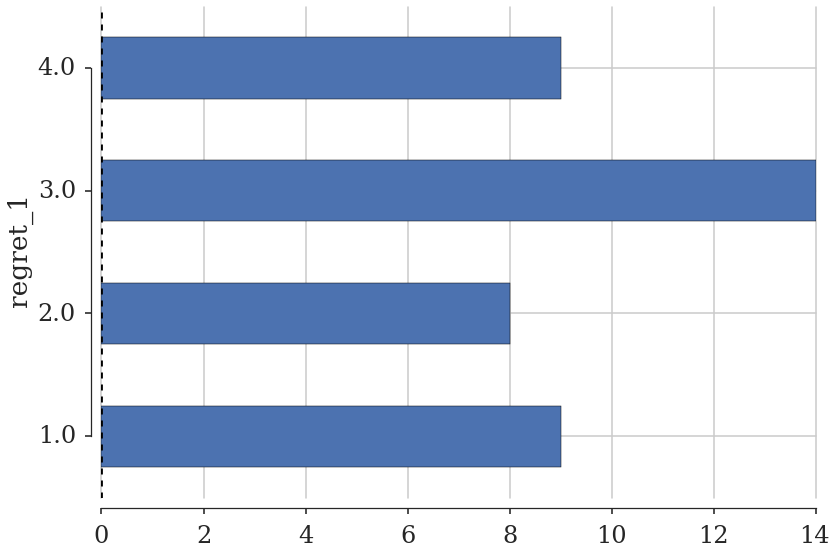

In [17]:
s = f.groupby('regret_1')['regret_1'].count()
s.plot(kind='barh')
sns.despine(offset=10, trim=True)

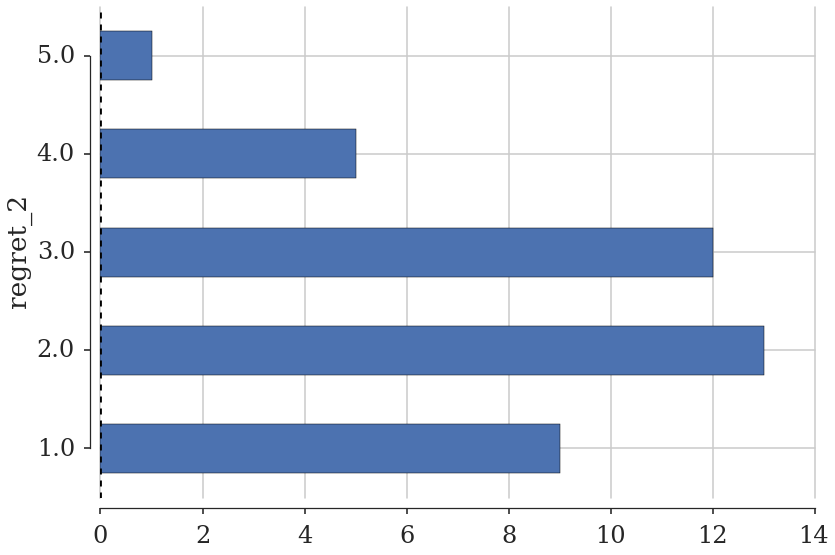

In [18]:
s = f.groupby('regret_2')['regret_2'].count()
s.plot(kind='barh')
sns.despine(offset=10, trim=True)

In [19]:
## Getting the formated dataframe
full_set = gg.get_rm_ws_df('regret_1','regret_2')
full_set2 = gg.get_rm_ws_df('with_who_1','with_who_2')
full_set3 = gg.get_rm_ws_df('when_to_1','when_to_2')

new_data_full= full_set
new_data_full['with_who'] = full_set2.response
new_data_full['when_to'] = full_set3.response
(new_data_full.head(7))
new_data_full['when_to'] = new_data_full['when_to'].replace(['nan','6m','1y','3y','10y'],[0,1,2,6,20])


# full_set_var = gg.add_survey_data(new_data_full,'man_hours')

# full_set_var.ix[np.random.choice(full_set_var.index.values, 10)]



rm_ws_dataframe - Droping missing records
(40, 5)
rm_ws_dataframe - remove missing data 
(40, 5)
rm_ws_dataframe - no duplicates 
(80, 5)
3    26
2    21
1    18
4    14
5     1
dtype: int64
rm_ws_dataframe - Droping missing records
(40, 5)
rm_ws_dataframe - remove missing data 
(40, 5)
rm_ws_dataframe - no duplicates 
(80, 5)
4    63
3    10
2     7
dtype: int64
rm_ws_dataframe - Droping missing records
(40, 5)
rm_ws_dataframe - remove missing data 
(40, 5)
rm_ws_dataframe - no duplicates 
(80, 5)
nan    64
6m      7
10y     6
1y      2
3y      1
dtype: int64


##Check for Corrlation between the two vairbales who and when

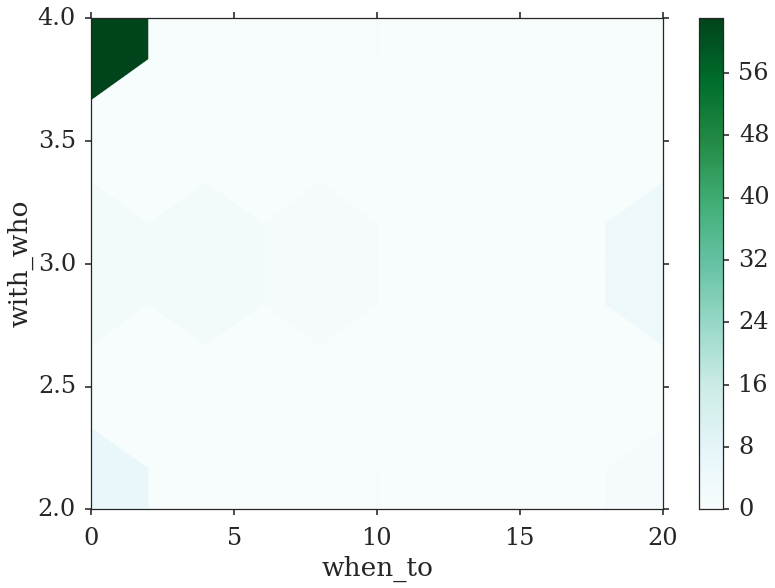

In [20]:
new_data_full['with_who'] = new_data_full['with_who'].astype('int')
new_data_full['when_to'] = new_data_full['when_to'].astype('int')
new_data_full.plot(x='when_to', y='with_who', kind='hexbin', gridsize=5, reduce_C_function=np.max)


>IS not that this two measures are corralated. They are counfounded due to the design. Then you can use one or te other variable in the experiment. it really doesn't matter. However you should use with_WHO becuase all of the mexperience that one at least.

## Check for Carry over effects

In [21]:
%%R -i ss -o wtpvdd

ss$with_who_1<-factor(ss$with_who_1)


print(aggregate(ss$sum, by=list(ss$treatment_eval_1), mean))
print(wilcox.test(ss$sum~factor(ss$treatment_eval_1),paired = FALSE))
wt <- wilcox.test(ss$sum~factor(ss$treatment_eval_1),paired = FALSE)



print(wilcox.test(ss$diff~factor(ss$treatment_eval_1),paired = FALSE))
print(wilcox.test(ss$regret_1~factor(ss$treatment_eval_1),paired = FALSE, conf.int=TRUE ))
print(friedman.test(regret_1~treatment_eval_1 | with_who_1, data=ss ))

wtpvdd<-wt$p.value
print(wtpvdd)

  Group.1        x
1       A 5.526316
2       B 4.476190

	Wilcoxon rank sum test with continuity correction

data:  ss$sum by factor(ss$treatment_eval_1)
W = 265.5, p-value = 0.0688
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  ss$diff by factor(ss$treatment_eval_1)
W = 258, p-value = 0.07537
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  ss$regret_1 by factor(ss$treatment_eval_1)
W = 292, p-value = 0.009651
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 4.766551e-05 1.999969e+00
sample estimates:
difference in location 
             0.9999668
Error in friedman.test.default(c(3, 3, 4, 2, 3, 1, 2, 1, 4, 2, 3, 4, 1,  : 
  not an unreplicated complete block design


/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in friedman.test.default(c(3, 3, 4, 2, 3, 1, 2, 1, 4, 2, 3, 4, 1,  : 
  not an unreplicated complete block design

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: In addition: 
  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Warning messages:

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 1: 
  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: In wilcox.test.default(x = c(7L, 5L, 5L, 4L, 2L, 4L, 6L, 7L, 6L,  :
  res = super(Function,

### Grizzzle Method

(40, 44)
1.05012531328
0.384711779449


/Users/kristian/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


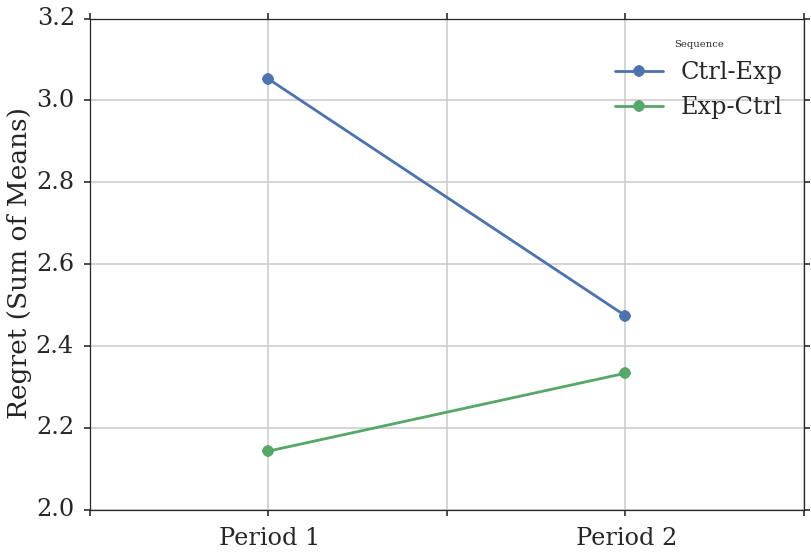

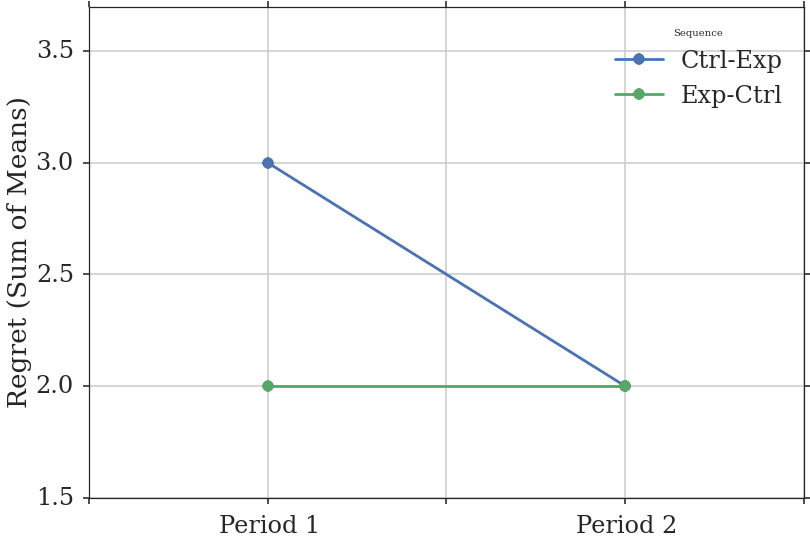

In [22]:
ss =  gg.code_for_stat_ana()
# ss['usability_2'] = ss.apply(lambda row: np.median([row['ease_2'],row['support_2'],row['time_2']]), axis=1)
# ss['usability_1'] = ss.apply(lambda row: np.median([row['ease_1'],row['support_1'],row['time_1']]), axis=1)
ss['sequ'] = ss['treatment_eval_1']
ss['sequ'] = ss['sequ'].replace(['A','B'],['AB','BA'])
ss['sum']  = ss['regret_1'].astype('int') + ss['regret_2'].astype('int')
ss['diff'] =  ss['regret_1'].astype('int') - ss['regret_2'].astype('int')
xx =  ss[['treatment_eval_1','diff','sum']]
AB = xx[xx['treatment_eval_1'] == 'A']
BA = xx[xx['treatment_eval_1'] == 'B']
sum1= AB['sum'].sum()/AB.shape[0]
sum2= BA['sum'].sum()/BA.shape[0]
diff1= AB['diff'].sum()/AB.shape[0]
diff2= BA['diff'].sum()/BA.shape[0]


print sum1 - sum2
print (diff1 - diff2)/2

ll =  ss[['sequ','regret_1','regret_2']]
ll.columns = ['Sequence','Period 1','Period 2']
ll['Sequence'] = ll['Sequence'].replace(['AB','BA'],['Ctrl-Exp','Exp-Ctrl'])


ax = ll.groupby(['Sequence']).mean().transpose().plot(marker='o')
# sns.despine(offset=10, trim=True)

ax.set_xlim(np.array([-0.5, 0.5]) + ax.get_xlim() )
ax.set_ylabel("Regret (Sum of Means)")
ax.set_xticklabels(["",'Period 1',"",'Period 2',""])
# wtpv1="p-v= "+ str(round(wtpvdd[0],3))
# ax.text(1,2.625,wtpv1, fontsize=20)


savefig(picture_foler+'regretCarryPlt.png', bbox_inches='tight',dpi=200)
pax = ll.groupby(['Sequence']).median().transpose().plot(marker='o')
# sns.despine(offset=10, trim=True)

pax.set_xlim(np.array([-0.5, 0.5]) + pax.get_xlim() )
pax.set_ylim(np.array([-0.5, 0.5]) + pax.get_ylim() )
pax.set_ylabel("Regret (Sum of Means)")
pax.set_xticklabels(["",'Period 1',"",'Period 2',""])


### My method for Carry over

In [23]:
co_check_df = new_data_full[new_data_full['period'] == '1']

In [24]:
%%R -i co_check_df
library(ordinal)


s <- data.frame(co_check_df)
s$response <- factor(s$response)
s$trt <- factor(s$trt)
s$sequ <- factor(s$sequ)
s$period <- factor(s$period)

clm <- clm(response ~ sequ , data=s, link="loglog",Hess = TRUE, nAGQ = 10, threshold="symmetric"  )

print (summary(clm))
exp(cbind(OR =coef(clm), confint(clm)))
print(exp(cbind(OR =coef(clm), confint(clm))))


Error in library(ordinal) : there is no package called ‘ordinal’


##Check for with link model to use

Higher Likehood ratio is best

In [25]:
%%R -i new_data_full

s <- data.frame(new_data_full)
s$response <- factor(s$response)
s$trt <- factor(s$trt)
s$sequ <- factor(s$sequ)
s$period <- factor(s$period)
s$when_to <- factor(s$when_to)
s$with_who <- as.numeric(s$with_who)

links <- c("logit", "probit", "cloglog", "loglog")
sapply(links, function(link) {  clmm(response ~ trt + period + sequ + (1 | with_who )+ (1 | id:sequ) , s, link=link ,Hess = TRUE, threshold="flexible")$logLik })




Error in FUN(X[[i]], ...) : could not find function "clmm"


/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in FUN(X[[i]], ...) : could not find function "clmm"

  res = super(Function, self).__call__(*new_args, **new_kwargs)


##Check for with threshold to use

Higher Likehood ratio is best

In [26]:
%%R -i new_data_full

s <- data.frame(new_data_full)
s$response <- factor(s$response)
s$trt <- factor(s$trt)
s$sequ <- factor(s$sequ)
s$period <- factor(s$period)
s$when_to <- factor(s$when_to)
s$with_who <- as.numeric(s$with_who)

thresholds <- c("equidistant", "symmetric")
 
anov<-function(threshold){
mt2 <- clmm(response ~ trt + period + sequ + (1 | with_who )+ (1 | id:sequ) , s, link="loglog" ,Hess = TRUE, threshold=threshold)
x1 <- clmm(response ~ trt + period + sequ + (1 | with_who )+ (1 | id:sequ) , s, link="loglog" ,Hess = TRUE, threshold="flexible")
summa<-anova(x1, mt2)
(summa$'Pr(>Chisq)'[2])
}

sapply(thresholds, anov)



Error in FUN(X[[i]], ...) : could not find function "clmm"


> Since the p-value is significant there is argument agianst using anyother threshold

## Effects on Regret due to PREFERENCE and/or the Design

The regret analysis present a variation with other analysis. 

The response is what users selected in the survey and the responses of the experiment are now a parameter in the model. 

But is a fix effect or a random effect??

In [27]:
%%R -i new_data_full
library(ordinal)
library(MASS)

s <- data.frame(new_data_full)
s$response <- factor(s$response)
s$trt <- factor(s$trt)
s$sequ <- factor(s$sequ)
s$period <- factor(s$period)
s$when_to <- (s$when_to)
s$with_who <- (s$with_who)

regret.mm.who <- clmm(response ~ sequ  + trt + period  + (1 | with_who) + (1 | id:sequ), s, link="loglog", Hess = TRUE, threshold="flexible")
regret.mm.whe <- clmm(response ~ sequ  + trt + period  + (1 | when_to) + (1 | id:sequ), s, link="loglog", Hess = TRUE, threshold="flexible")
regret.mm <- clmm(response ~ sequ  + trt + period  + (1 | id:sequ), s, link="loglog", Hess = TRUE,  threshold="flexible")



Error in library(ordinal) : there is no package called ‘ordinal’


regret.mm.who is a model when we look at the effects ON Regret By who they share with   
regret.mm.whe is a model when we look at the effects ON Regret By when they share with   
regret.mm is a model when we look at the effects ON Regret By who the experimental design   

In [28]:
%%R

print("***********")
print(summary(regret.mm))
print("***********")
print(summary(regret.mm.who))
##print("***********")
##print(summary(regret.mm.whe))


##print("------------")
##print(anova(regret.mm.whe, regret.mm))
print("------------")
print(anova(regret.mm.who, regret.mm))
##print("------------")
##print(anova(regret.mm.who, regret.mm.whe))


[1] "***********"
Error in summary(regret.mm) : object 'regret.mm' not found


/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in summary(regret.mm) : object 'regret.mm' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


> The model with random variables explains a bit more of the phenomenon but explains as much as it does with either vairbales.
> unfortunately in CMML we can not use NGA and only 2 randowm variables can be included in the model    

> regret.mm IT can been said the either treatment do not affect regret
> but adding their choices to the model changes the outcome, so their choices are mapped to their regret


In [29]:
%%R


library(texreg)
source('clmm_extractor.r')

texreg(list(regret.mm.who), ci.force = TRUE, ci.test = 1, ci.force.level = 0.95 , float.pos = "tb",
      caption = "Regret CLMM model",  use.packages = FALSE, single.row = FALSE, custom.coef.names=c("Sequence","Period","Treatment","Accessibility"),
      custom.model.names = c("CLMM model"),)




Error in library(texreg) : there is no package called ‘texreg’


/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in library(texreg) : there is no package called ‘texreg’

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [30]:
%%R
plot_odds(regret.mm.who,'Odds ratios and CI')   




Error in withVisible({ : could not find function "plot_odds"


/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in withVisible({ : could not find function "plot_odds"

  res = super(Function, self).__call__(*new_args, **new_kwargs)


## Check first period as a Oridnal Logistical Regresion model


we do OLR becasue we have 2 or more IVs (independent groups) they are odinal. We cannot use friedman or wilconxo without loosing one of those vairbales. 
But the ORL is only for binary outputs not ordinal like we have. so we need CLM but since both accessibility and treatment would be fixed variels.

In [31]:
first_period_data = new_data_full[new_data_full['period'] == "1"]
first_period_data.head(10)

,response,trt,sequ,period,id,with_who,when_to
0,3,A,AB,1,0687ef14d441706b211ff0edf9f2ebea,4,0
1,3,A,AB,1,0ddaf25718c6b4c35bf05ae6335150d4,2,20
2,4,A,AB,1,18da94199bf2471a70d0298958543bb4,4,0
3,2,A,AB,1,23ba4e6b2b149ba6294bd7e0125b2948,4,0
5,1,A,AB,1,2be130732b05502a4a631bc01291b25b,4,0
6,2,A,AB,1,38c7d17c9d41c293afe9d368d45a629c,4,0
8,4,A,AB,1,4306bad121fb3ad1fb2365dda1a32440,4,0
11,4,A,AB,1,6b216d7a04c90e3490fb335b6dc39314,3,20
17,3,A,AB,1,7f6ad16cca9e095737b8ad8089f11f51,2,0
19,3,A,AB,1,84435907d0139de1cd4eaf5a4992ee6c,4,0


In [32]:
%%R -i first_period_data

s <- data.frame(first_period_data)
s$response <- factor(s$response)
s$trt <- factor(s$trt)
s$sequ <- factor(s$sequ)
s$period <- factor(s$period)
s$when_to <- (s$when_to)
s$with_who <- factor(s$with_who)

regret.olr.who <- polr(response ~ trt + with_who, data=s, Hess = TRUE)
regret.clm.who <- clm(response ~ trt + with_who, data=s, Hess = TRUE)



Error in withVisible({ : could not find function "polr"


/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in withVisible({ : could not find function "polr"

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [33]:
%%R
print(summary(regret.olr.who))
print(summary(regret.clm.who))
plot_odds(regret.olr.who,'Odds ratios and CI')   



Error in summary(regret.olr.who) : object 'regret.olr.who' not found


/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in summary(regret.olr.who) : object 'regret.olr.who' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


## ~~Effects on Regret with Who as a Fixed variable and when_to as Random~~

Not needed anymore because bot hvariables are confounded

In [34]:
%%R -i new_data_full

s <- data.frame(new_data_full)
s$response <- factor(s$response)
s$trt <- factor(s$trt)
s$sequ <- factor(s$sequ)
s$period <- factor(s$period)
s$when_to <- (s$when_to)
s$with_who <- (s$with_who)

regret.mm.who <- clmm(response ~ sequ  + trt + period  + with_who + (1 | when_to) + (1 | id:sequ), s, link="loglog", Hess = TRUE, threshold="flexible")
regret.mm   <- clmm(response ~ sequ  + trt + period  + (1 | id:sequ), s, link="loglog", Hess = TRUE,  threshold="flexible")



Error in withVisible({ : could not find function "clmm"


/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in withVisible({ : could not find function "clmm"

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [35]:
%%R

print("***********")
print(summary(regret.mm))
print("***********")
print(summary(regret.mm.who))
print("***********")


print("------------")
print(anova(regret.mm.who, regret.mm))


[1] "***********"
Error in summary(regret.mm) : object 'regret.mm' not found


## CMML Model

In [36]:
%%R -i new_data_full -o mm1
library(ordinal)
library(MASS)

s <- data.frame(new_data_full)
s$response <- factor(s$response)
s$trt <- factor(s$trt)
s$sequ <- factor(s$sequ)
s$period <- factor(s$period)
s$when_to <- factor(s$when_to)
s$with_who <- as.numeric(s$with_who)


##mm1 <- clmm(response ~ sequ  + trt + period   + (1 | id:sequ), s, link="loglog", Hess = TRUE, nAGQ = 10 )
mm1 <- clmm(response ~ sequ  + trt + period  + (1 | when_to) + (1 | id:sequ), s, link="loglog", Hess = TRUE, threshold="symmetric")
mm2 <- clmm(response ~ sequ  + period  + (1 | when_to) + (1 | id:sequ), s, link="loglog", Hess = TRUE, threshold="symmetric")

##step <- stepAIC(mm1)

#print ((step$anova ))

print (summary(mm1))
print(exp(cbind(OR =coef(mm1), confint(mm1))))

source('regression_plots.r')
plot_odds(mm1,'Odds ratios and CI')

print(anova(mm1,mm2))



Error in library(ordinal) : there is no package called ‘ordinal’


In [37]:
 %%R -i full_set -o mm1 -o mm2
library(ordinal)

s <- data.frame(new_data_full)
s$response <- factor(s$response)
s$trt <- factor(s$trt)
s$sequ <- factor(s$sequ)
s$period <- factor(s$period)
s$when_to <- factor(s$when_to)
s$with_who <- as.numeric(s$with_who)


mm1 <- clmm(response ~ sequ  + trt + period   + (1 | id:sequ), s, link="loglog", Hess = TRUE, nAGQ = 7, threshold="symmetric" )
mm2 <- clmm(response ~ sequ  + period + (1 | id:sequ), s, link="loglog", Hess = TRUE, nAGQ = 7, threshold="symmetric" )
    

    print (summary(mm1))
##    exp(cbind(OR =coef(mm2), confint(mm2)))
plot_odds(mm1,'Odds ratios and CI')   


Error in library(ordinal) : there is no package called ‘ordinal’


In [38]:
%%R 
anova(mm2, mm1)


Error in anova(mm2, mm1) : object 'mm2' not found


/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in anova(mm2, mm1) : object 'mm2' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


> The significant effect of the treatment is interesting it probabibly means that the impression give by the first treatment is important. Since the relation is positive this means that the AB sequence tends to bring more regretful responses than the BA sequecen?

In [39]:
%%R -i mm1

library(texreg)
source('clmm_extractor.r')

##screenreg

screenreg(mm1, ci.force = TRUE, ci.test = 1, ci.force.level = 0.95 , float.pos = "tb",
      caption = "Enforcing confidence intervals.",  use.packages = FALSE, single.row = FALSE,
      custom.model.names = c("Regret"),
      )

NameError: name 'mm1' is not defined

>sequence group effect is confirmed. what it means we can only use the first period. but actually we find an effect even then